In [122]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [123]:
# label: true = 0, fake = 1

In [124]:
experiment_name = "mistral_10k"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [125]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [126]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 13377
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1671
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1671
    })
})

In [127]:
fake_train_dataset['train'][0]

{'text': 'Former Vice President Dick Cheney on Sunday defended the Bush administration\'s economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We\'ve accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN\'s "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla',
 'label': 0}

In [128]:
print(fake_train_dataset['train'][0]['text'])

Former Vice President Dick Cheney on Sunday defended the Bush administration's economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We've accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN's "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla


In [129]:
fake_train_dataset['train'][2]

{'text': 'Space shuttle Discovery launched just before midnight Friday on a 13-day mission to the international space station.  The launch was delayed from Thursday because of high winds and bad weather.  Discovery is carrying a new solar array and a storage unit for the station. The solar array will provide power to the station, which is scheduled to be completed in 2010.  The crew will also conduct two spacewalks. One will replace a broken pump that supplies coolant to the station’s ammonia cooling syst',
 'label': 1}

In [130]:
print(fake_train_dataset['train'][2]["text"])

Space shuttle Discovery launched just before midnight Friday on a 13-day mission to the international space station.  The launch was delayed from Thursday because of high winds and bad weather.  Discovery is carrying a new solar array and a storage unit for the station. The solar array will provide power to the station, which is scheduled to be completed in 2010.  The crew will also conduct two spacewalks. One will replace a broken pump that supplies coolant to the station’s ammonia cooling syst


In [131]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_train_df.head()

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Space shuttle Discovery launched just before m...,0
2,Space shuttle Discovery launched just before m...,1
3,When Eileen Mather lands in Mexico City on her...,0
4,When Eileen Mather lands in Mexico City on her...,1


In [132]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


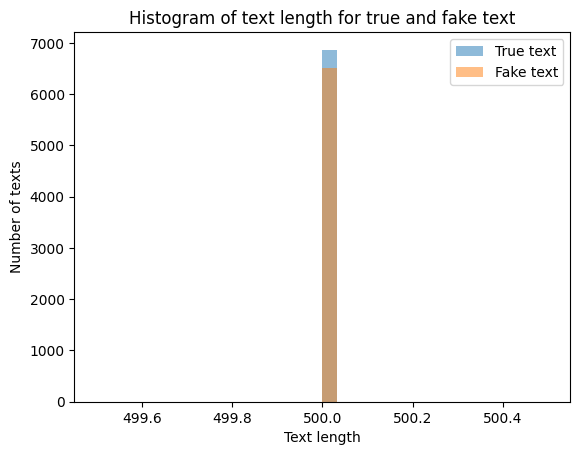

In [133]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [134]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 0.0
Average number of newlines in text with label 1 (=Fake text): 0.0


In [135]:
fake_train_df.describe()

,label
count,13377.000000
mean,0.486731
std,0.499843
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [136]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,6511.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [137]:
fake_train_df.head(20)

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Space shuttle Discovery launched just before m...,0
2,Space shuttle Discovery launched just before m...,1
3,When Eileen Mather lands in Mexico City on her...,0
4,When Eileen Mather lands in Mexico City on her...,1
5,Zimbabwean lawmakers on Monday narrowly voted ...,0
6,Zimbabwean lawmakers on Monday narrowly voted ...,1
7,Former detainees of Immigration and Customs En...,0
8,Former detainees of Immigration and Customs En...,1
9,A memorial cruise is scheduled to set sail 100...,0


In [138]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


In [139]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


0.0

In [140]:
test_text = "This a test text. It is not very long. It is just a test."

" ".join(test_text.split()[:10])

'This a test text. It is not very long. It'

# Test set

In [141]:
fake_train_dataset["train"][2:6]

{'text': ['Space shuttle Discovery launched just before midnight Friday on a 13-day mission to the international space station.  The launch was delayed from Thursday because of high winds and bad weather.  Discovery is carrying a new solar array and a storage unit for the station. The solar array will provide power to the station, which is scheduled to be completed in 2010.  The crew will also conduct two spacewalks. One will replace a broken pump that supplies coolant to the station’s ammonia cooling syst',
  "When Eileen Mather lands in Mexico City on her way to Tapachula, Mexico, she learns her airline ticket isn't valid. Her airline forces her to buy a new one. Mather asks her online agency, Cheapoair.com, for a refund, but more than six months later, she's still out $879. Is she also out of options? Q: I need your help getting my money back for a plane ticket I had to pay for twice. Here's my story: I bought tickets online through Cheapoair.com from Philadelphia to Tapachula, Mexi

In [142]:
fake_test_df = pd.read_json("fake_true_dataset_mistral_10k_test.json")
fake_test_df.head()

,text,label
0,[Relatives of the 89 people killed in Sunday's...,0
1,[Relatives of the 89 people killed in Sunday's...,1
2,[The ninth floor of the Miami-Dade pretrial de...,0
3,[The ninth floor of the Miami-Dade pretrial de...,1
4,[A key rebel commander and fugitive from a U.S...,0


In [143]:
fake_test_df = pd.DataFrame(fake_train_dataset['test'])
fake_test_df.head(10)

,text,label
0,British boxer Amir Khan has retained his WBA l...,0
1,"How are the elements of the charming, traditio...",0
2,"How are the elements of the charming, traditio...",1
3,South Carolina authorities have located a 555-...,0
4,South Carolina authorities have located a 555-...,1
5,A man accused of shooting into a crowd outside...,0
6,A man accused of shooting into a crowd outside...,1
7,The son of Gabon's former president was declar...,0
8,The son of Gabon's former president was declar...,1
9,The Scottish woman who became an Internet sing...,0


In [144]:
fake_test_df["text"][2]

'How are the elements of the charming, traditional romantic comedy (Cinderella, The Princess Bride, When Harry Met Sally, Sleepless in Seattle) translated into a modern story? In the case of The Wedding Date, a new romantic comedy from writer/director Clare Kilner (The Wedding Video), the formula is the same: a young woman (Debra Messing) has to go to a wedding with a man she doesn’t know (Dermot Mulroney) and they end up falling in love.  The Wedding Date is a fun movie, but it’s not as funny as'

In [145]:
fake_test_df["text"].unique().shape

(1671,)

In [146]:
#num_rows: 13377
fake_train_df["text"].unique().shape

(13377,)

In [150]:
# number of samples with label 0 and label 1 in the training dataset and the test dataset
print("Number of samples with label 0 in the training dataset:", fake_train_df[fake_train_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the training dataset:", fake_train_df[fake_train_df["label"] == 1].shape[0])
print("Number of samples with label 0 in the test dataset:", fake_test_df[fake_test_df["label"] == 0].shape[0])
print("Number of samples with label 1 in the test dataset:", fake_test_df[fake_test_df["label"] == 1].shape[0])

Number of samples with label 0 in the training dataset: 6866
Number of samples with label 1 in the training dataset: 6511
Number of samples with label 0 in the test dataset: 860
Number of samples with label 1 in the test dataset: 811
